## Importing libraries

In [1]:
import requests
import pandas as pd
import pandas_datareader.data as web
import datetime
from datetime import datetime
import numpy as np
import re
import APIs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
%config InlineBackend.figure_format='retina'
fred_key = APIs.fred_api

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

Defining function to get fred data: fredData

In [3]:
def fredData(request_dict, start_date, end_date, api_key, freq = 'Q'):
    """ download some data from fred """
    import pandas as pd
    import numpy as np
    import requests
    base = 'https://api.stlouisfed.org/fred/series/observations?series_id='
    dates = '&observation_start={}&observation_end={}'.format(start_date, end_date)
    api_key = '&api_key={}'.format(api_key)
    ftype = '&file_type=json'
    
    dataFrame = pd.DataFrame()
    for code, name in request_dict.items():
        url = '{}{}{}{}{}'.format(base, code, dates, api_key, ftype)
        r = requests.get(url).json()['observations']
        dataFrame[name[0]] = [i['value'] for i in r]

    dataFrame = dataFrame.replace('.', np.nan)    
    dataFrame = dataFrame.astype(float)

    sectors = pd.MultiIndex.from_tuples(list(zip([i[1] 
                                                  for i in request_dict.values()],[i[0] 
                                                                                   for i in request_dict.values()])))
    dataFrame.columns = sectors

    dates = pd.date_range(start_date, periods=dataFrame.shape[0], freq=freq)
    dataFrame.index = dates
    return dataFrame

"""
# usage 
df = fredData(request_dict=q_dict, start_date=start_date, end_date=end_date, api_key=fred_key)
df
"""

'\n# usage \ndf = fredData(request_dict=q_dict, start_date=start_date, end_date=end_date, api_key=fred_key)\ndf\n'

Getting crisis data

In [4]:
recessions = pd.read_html('https://www.nber.org/cycles/cyclesmain.html')

peak = recessions[0][0][4]
peak = peak.replace('(I)', '/')
peak = peak.replace('(II)', '/')
peak = peak.replace('(III)', '/')
peak = peak.replace('(IV)', '/')
peak = peak.split('/ ')
peak[-1] = peak[-1].replace(" /", "")
peak = [datetime.strptime(i, '%B %Y') for i in peak]
peak = peak[-8:]

trough = recessions[0][1][4]
trough = trough.replace('(I)', '/')
trough = trough.replace('(II)', '/')
trough = trough.replace('(III)', '/')
trough = trough.replace('(IV)', '/')
trough = trough.replace('March 1991/  November 2001', 'March 1991 / November 2001', )
trough = trough.split(' / ')
trough[-1] = trough[-1].replace(" /", "")
trough = [datetime.strptime(i, '%B %Y') for i in trough[1:]]
trough = trough[-8:]

crisis = pd.DataFrame({'peak': peak, 'trough': trough})

## Quarterly data

In [5]:
start = '1979-12-31'
end = '2015-01-01'

q_dict = {
    'TABSHNO': ['Total Assets', 'Asset'],
    'TTABSHNO': ['Total Non-Financial Assets', 'Asset'],
    'CDGABSHNO': ['Durable Goods', 'Asset', 'Current Cost Basis'],
    'HNOREMV': ['Real Estate Market Value', 'Asset'],
    'TFAABSHNO': ['Total Financial Assets', 'Asset'],
    'TSDABSHNO' : ['Savings Deposits', 'Asset'],
    'TSABSHNO' : ['Treasury Securities', 'Asset', 'Including U.S. Savings Bonds', '(DISCONTINUED)'],
    #'OTABSHNO' : ['Treasury Securities', 'Asset', 'Excluding U.S. Savings Bonds', '(DISCONTINUED)'],
    'MMFSABSHNO' : ['Money Market Mutual Fund Shares', 'Asset'],
    'HNOCEA' : ['Corporate Equities', 'Asset'],
    'MMFSABSHNO' : ['Money Market Mutual Fund Shares', 'Asset'],
    'NOCCSLA' : ['Student Loans', 'Asset', 'Consumer Credit'],
    'SCABSHNO' : ['Security Credit', 'Asset'],
    'CMIABSHNO' : ['Credit Market Instruments', 'Asset'],
    'MABSHNO' : ['Mortgages', 'Asset'],
    'LIRABSHNO' : ['Life Insurance Reserves', 'Asset'],
    'MAABSHNO' : ['Total Miscellaneous Assets', 'Asset'],
    'TLBSHNO': ['Total Liabilities', 'Liability'],
    'CCLBSHNO': ['Consumer Credit', 'Liability'],
    'HMLBSHNO': ['Home Mortgages', 'Liability'],
    'CMLBSHNO': ['Commercial Mortgages', 'Liability'],
    'OLALBSHNO': ['Other Loans and Advances', 'Liability'],
    'TNWBSHNO': ['Total Net Worth', 'Net Worth'],
    'HNONWPDPI': ['% Disposable Personal Income', 'Net Worth'],
    'HNODPI': ['Disposable Personal Income', 'Income and Consumption'],
    #'RCVSRNWBSHNO': ['Residential Structures', 'Income and Consumption', 'Current Cost Basis'],
    #'NOREMV': ['Nonprofit Organizations', 'Real Estate Market Value'],
    #'OEHRENWBSHNO': ["Households Owners' Equity", 'Real Estate Market Value'],
}
quarterly = fredData(request_dict=q_dict, start_date=start, end_date=end, api_key=fred_key, freq='Q')

In [6]:
quarterly.tail()

Asset                                           \
           Total Assets Total Non-Financial Assets Durable Goods   
2014-03-31    96625.286                  27184.098      4784.529   
2014-06-30    98113.665                  27439.901      4810.601   
2014-09-30    98592.157                  27836.688      4843.384   
2014-12-31   100541.996                  28302.747      4860.528   
2015-03-31   102234.245                  28773.068      4882.298   

                                                                             \
           Real Estate Market Value Total Financial Assets Savings Deposits   
2014-03-31                21893.895              69441.188         7596.293   
2014-06-30                22117.492              70673.764         7643.334   
2014-09-30                22475.151              70755.469         7728.025   
2014-12-31                22917.716              72239.249         7895.399   
2015-03-31                23357.182              73461.177         8133.690   

                                                                \
           Treasury Securities Money Market Mutual Fund Shares   
2014-03-31              900.44                        1520.524   
2014-06-30              721.07                        1464.782   
2014-09-30              704.85                        1481.525   
2014-12-31              696.74                        1568.339   
2015-03-31              640.17                        1503.192   

                                                       ...              \
           Corporate Equities Student Loans            ...               
2014-03-31          12837.129        50.643            ...               
2014-06-30          13548.812        49.483            ...               
2014-09-30          13238.261        47.536            ...               
2014-12-31          13814.361        47.595            ...               
2015-03-31          14149.960        46.836            ...               

                                                               \
           Life Insurance Reserves Total Miscellaneous Assets   
2014-03-31                1420.733                   1027.623   
2014-06-30                1440.014                   1036.155   
2014-09-30                1450.050                   1038.335   
2014-12-31                1472.054                   1042.789   
2015-03-31                1492.391                   1045.376   

                   Liability                                 \
           Total Liabilities Consumer Credit Home Mortgages   
2014-03-31         14017.445        3100.078       9448.785   
2014-06-30         14151.978        3167.475       9442.214   
2014-09-30         14261.462        3246.127       9452.486   
2014-12-31         14336.467        3314.567       9464.474   
2015-03-31         14313.545        3319.710       9434.663   

                                                               Net Worth  \
           Commercial Mortgages Other Loans and Advances Total Net Worth   
2014-03-31              223.336                  461.899       82607.841   
2014-06-30              225.006                  518.309       83961.686   
2014-09-30              226.676                  533.563       84330.695   
2014-12-31              228.346                  513.970       86205.529   
2015-03-31              230.950                  499.229       87920.700   

                                            Income and Consumption  
           % Disposable Personal Income Disposable Personal Income  
2014-03-31                     639.7813                  12911.888  
2014-06-30                     639.3901                  13131.528  
2014-09-30                     633.2873                  13316.341  
2014-12-31                     640.1817                  13465.790  
2015-03-31                     647.8461                  13571.233  

[5 rows x 23 columns]

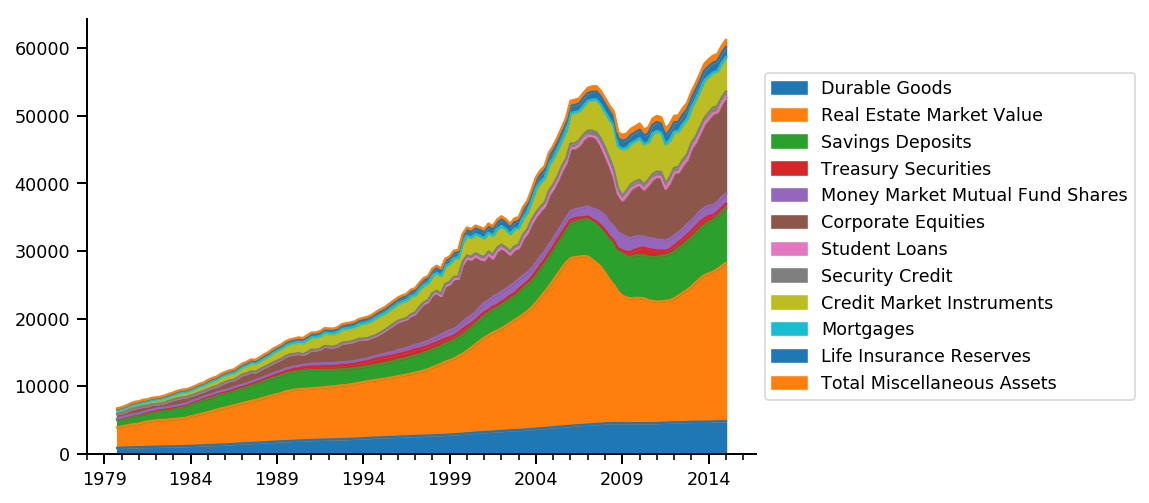

In [7]:
quarterly['Asset'].drop(['Total Assets', 'Total Financial Assets', 'Total Non-Financial Assets'], axis=1).plot.area()
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

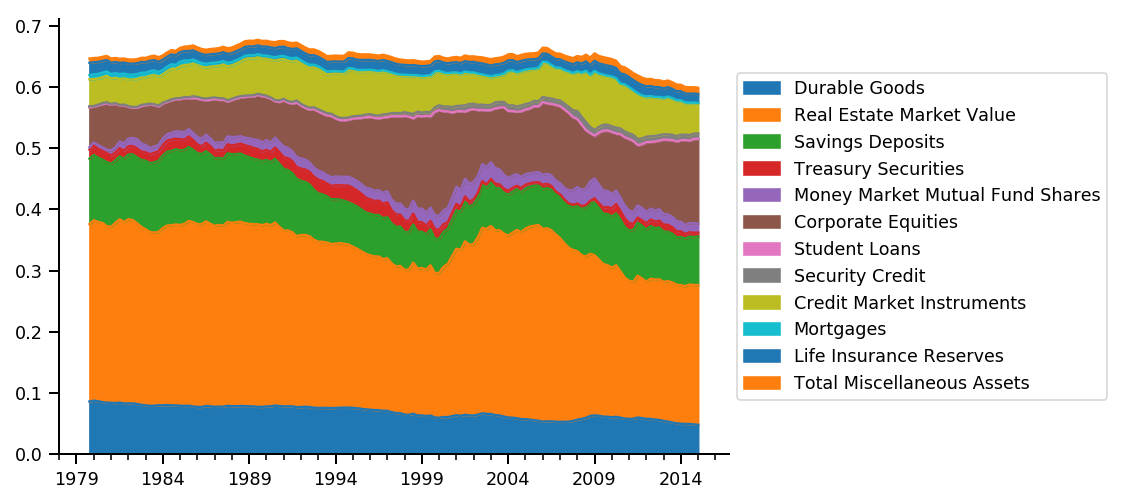

In [8]:
quarterly['Asset'].drop(['Total Assets', 'Total Financial Assets', 'Total Non-Financial Assets'], axis=1).divide(quarterly['Asset','Total Assets'], axis=0).plot.area()
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

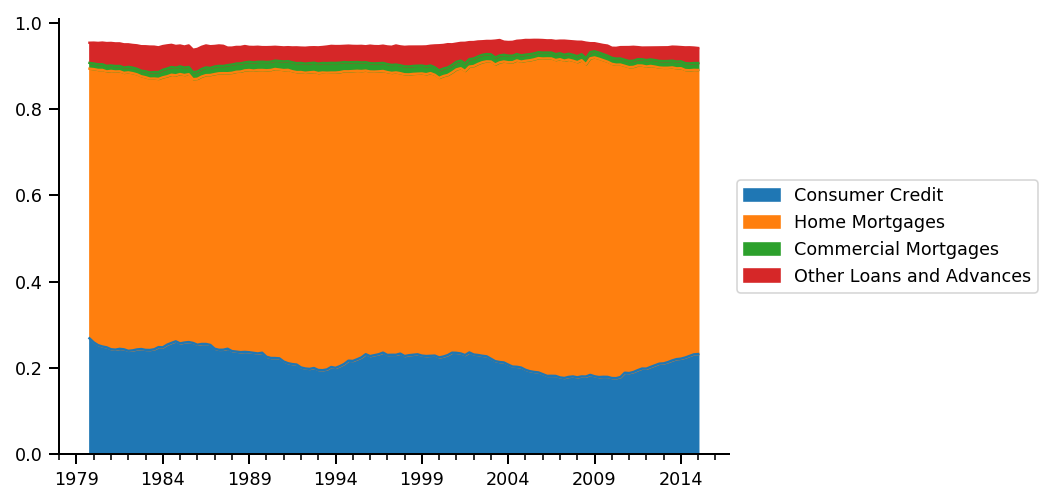

In [9]:
quarterly['Liability'].drop('Total Liabilities', axis=1).divide(quarterly['Liability','Total Liabilities'], axis=0).plot.area()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

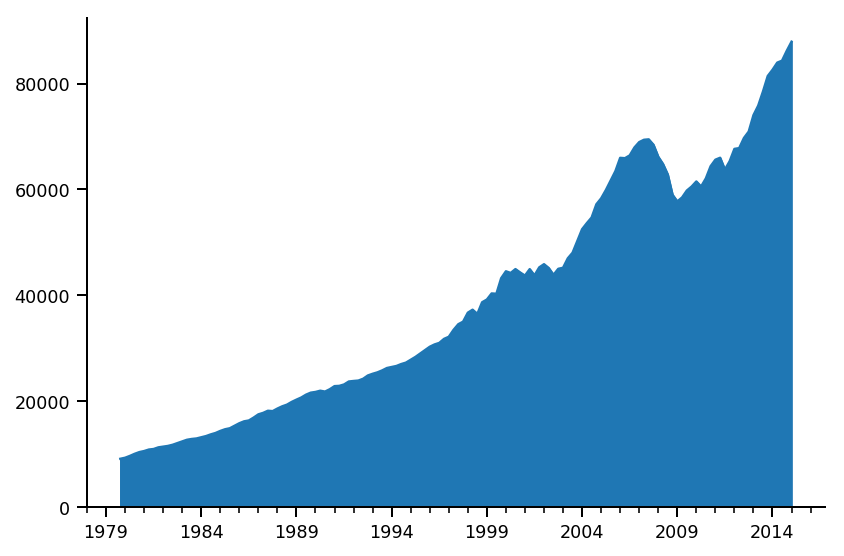

In [10]:
quarterly['Net Worth', 'Total Net Worth'].plot.area()
sns.despine()
plt.tight_layout()
plt.show()

# As a percentage of disposable personal income (SAAR)

In [11]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2015, 1, 1)

In [12]:
DPIdf = web.DataReader(['DPI', 'CDSP'], 'fred', start, end, access_key=fred_key)
DPIdf.columns = [
    'Disposable Personal Income (DPI)',
    'Consumer Debt Service Payments',
]

In [13]:
DPIdf.head()

Disposable Personal Income (DPI)  Consumer Debt Service Payments
DATE                                                                        
1980-01-01                          1947.118                        6.240027
1980-04-01                          1977.275                        6.151972
1980-07-01                          2046.297                        5.913000
1980-10-01                          2125.848                        5.740706
1981-01-01                          2177.992                        5.691433

In [14]:
start = '1980-01-01'
end = '2015-01-01'

SAAR_dict = {
    'DPI': ['Disposable Personal Income (DPI)', 'Disposable Personal Income'],
    #'HNONWPDP' : ['Net Worth (% DPI)', 'Net Worth'],
    'CDSP': ['Consumer Debt Service Payments', 'Liability']
}

DPI = fredData(request_dict=SAAR_dict, start_date=start, end_date=end, api_key=fred_key, freq='Q')

In [15]:
DPI.tail()

Disposable Personal Income                      Liability
           Disposable Personal Income (DPI) Consumer Debt Service Payments
2014-03-31                        12911.888                       5.209544
2014-06-30                        13131.529                       5.232607
2014-09-30                        13316.341                       5.262815
2014-12-31                        13465.790                       5.307268
2015-03-31                        13571.233                       5.370838

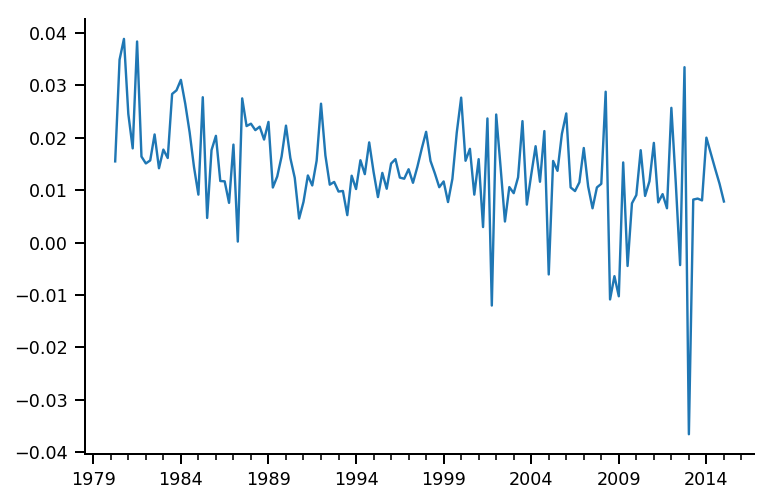

In [16]:
DPI['Disposable Personal Income', 'Disposable Personal Income (DPI)'].pct_change().plot()
sns.despine()
plt.show()

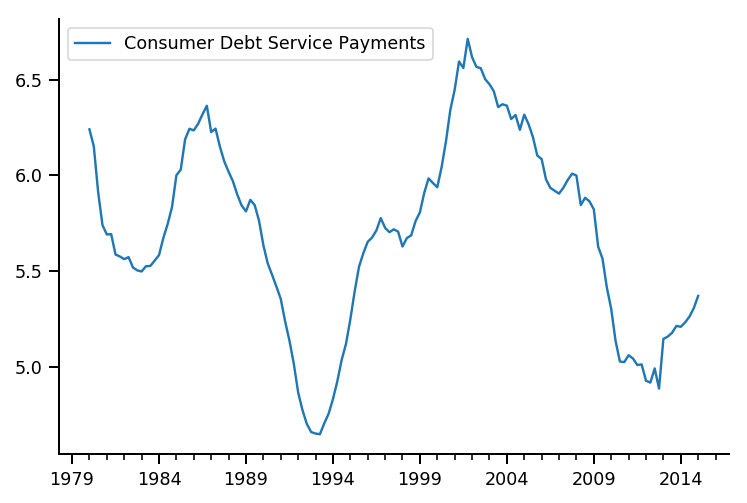

In [17]:
DPI['Liability'].plot()
sns.despine()
plt.show()

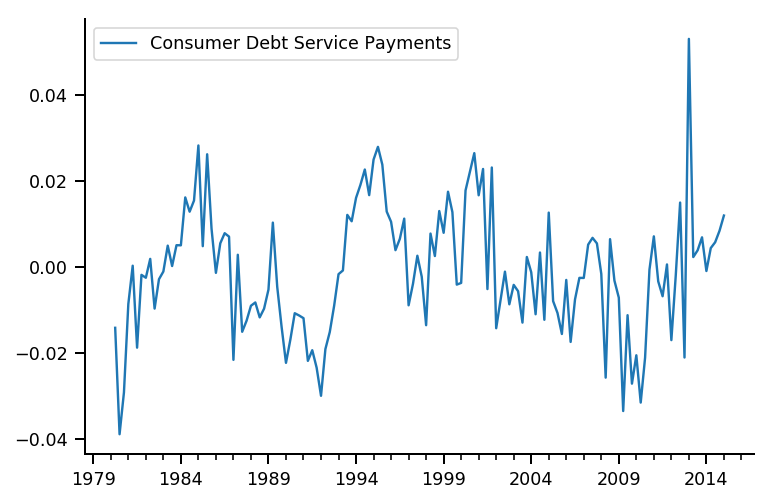

In [18]:
DPI['Liability'].pct_change().plot()
sns.despine()
plt.show()

# Capital Gains

In [19]:
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 1, 1)

CGdf = web.DataReader(['HNOREMQ027S', 'PRFI','DPI', 'HNOCEAQ027S'], 'fred', start, end, access_key=fred_key)
CGdf.columns = [
    'real estate at market value',
    'Private Residential Fixed Investment',
    'Disposable Personal Income (DPI)',
    'Corporate equities'
]

In [20]:
CGdf['CGh'] = CGdf['real estate at market value'].diff() - CGdf['Private Residential Fixed Investment']
CGdf['CGh/DPI'] = CGdf['CGh']/CGdf['Disposable Personal Income (DPI)']

In [21]:
CGdf.head()

real estate at market value  Private Residential Fixed Investment  \
DATE                                                                            
1960-01-01                     534527.0                                28.954   
1960-04-01                     539185.0                                26.684   
1960-07-01                     545818.0                                25.892   
1960-10-01                     547589.0                                25.893   
1961-01-01                     545980.0                                25.914   

            Disposable Personal Income (DPI)  Corporate equities       CGh  \
DATE                                                                         
1960-01-01                           371.359            344090.0       NaN   
1960-04-01                           375.715            350070.0  4631.316   
1960-07-01                           377.847            325875.0  6607.108   
1960-10-01                           379.358            364553.0  1745.107   
1961-01-01                           383.653            403160.0 -1634.914   

              CGh/DPI  
DATE                   
1960-01-01        NaN  
1960-04-01  12.326673  
1960-07-01  17.486199  
1960-10-01   4.600159  
1961-01-01  -4.261439

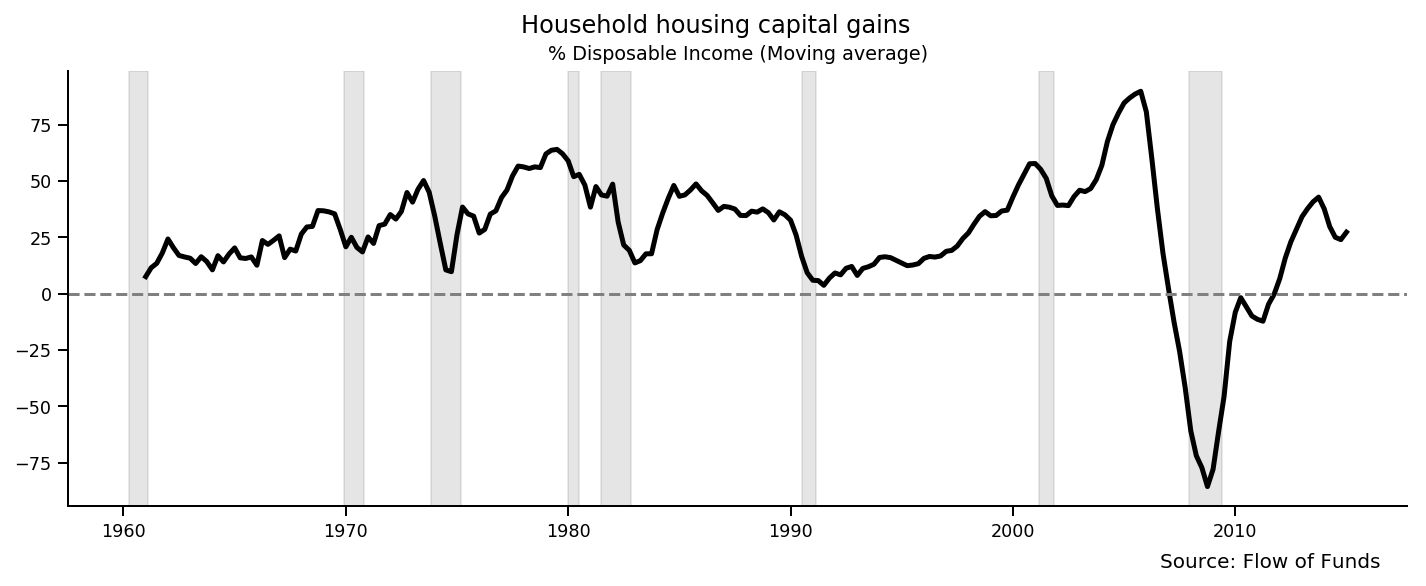

In [22]:
recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax = plt.subplots(figsize =(12,4))
ax.plot(CGdf['CGh/DPI'].rolling(4).mean(), lw=2.5, color='black')
for i in recessions.index:
    ax.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.1, color='k')

ax.set_xlabel("")
fig.suptitle("Household housing capital gains")
ax.set_title("% Disposable Income (Moving average)")
ax.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
ax.axhline(linewidth=1.5, color='gray', ls='dashed')
sns.despine()
plt.show()

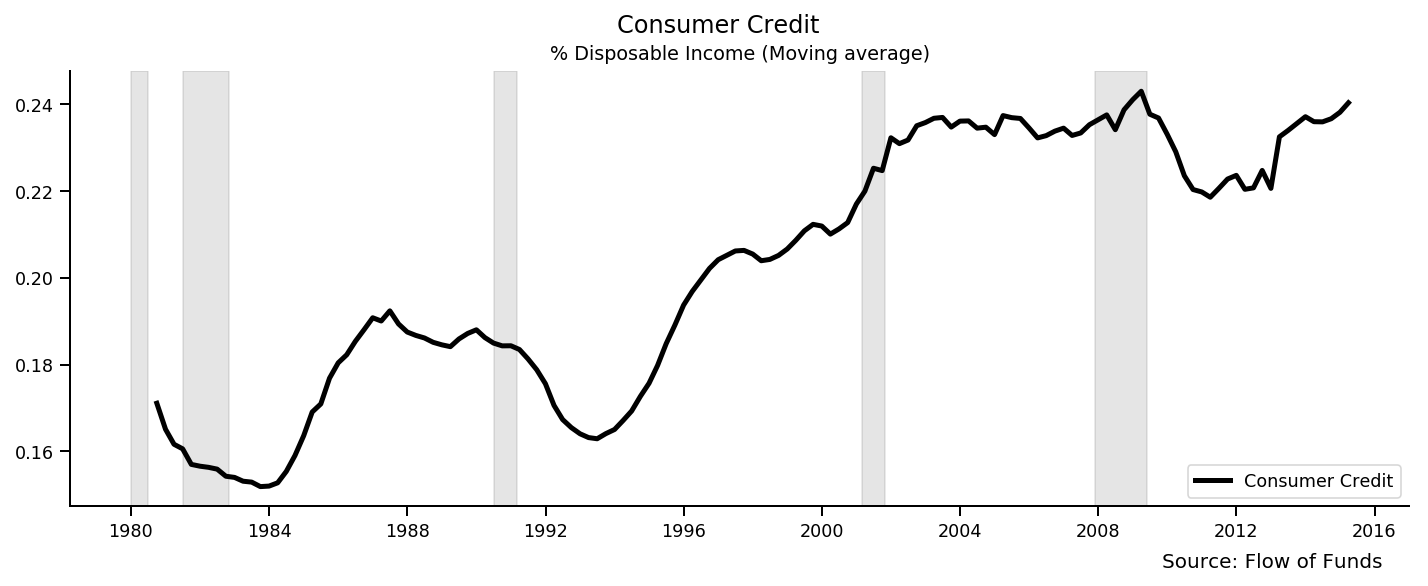

In [23]:
start = datetime.datetime(1979, 1, 1)

recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax = plt.subplots(figsize =(12,4))
ax.plot(quarterly['Liability', 'Consumer Credit'].rolling(4).mean().divide(quarterly['Income and Consumption', 'Disposable Personal Income']), 
        lw=2.5, color='black', label='Consumer Credit')
for i in recessions.index:
    ax.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.1, color='k')

ax.set_xlabel("")
fig.suptitle("Consumer Credit")
ax.set_title("% Disposable Income (Moving average)")
ax.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
sns.despine()
plt.legend()
plt.show()

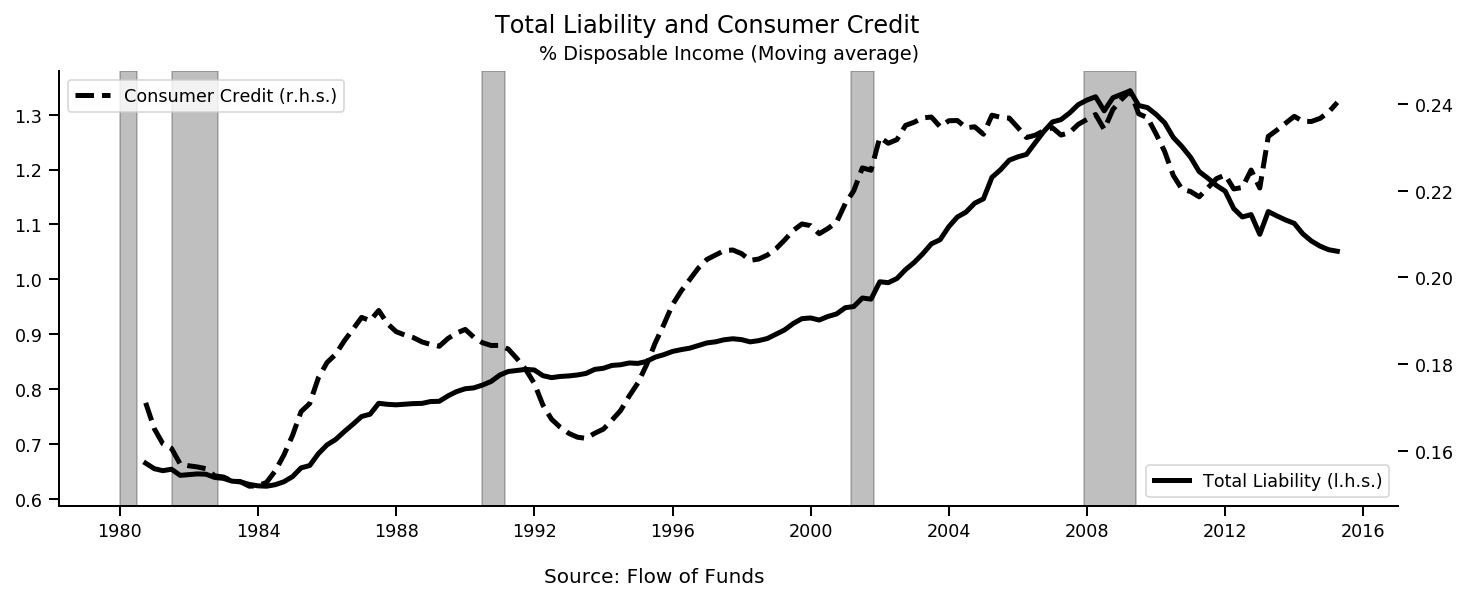

In [24]:
start = datetime.datetime(1979, 1, 1)

recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax1 = plt.subplots(figsize =(12,4))
ax1.plot(quarterly['Liability', 'Total Liabilities'].rolling(4).mean().divide(quarterly['Income and Consumption', 'Disposable Personal Income']), 
        lw=2.5, color='black', label='Total Liability (l.h.s.)')

for i in recessions.index:
    ax1.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.25, color='k')

ax1.set_xlabel("")
fig.suptitle("Total Liability and Consumer Credit")
ax1.set_title("% Disposable Income (Moving average)")
ax1.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
plt.legend()
ax2 = ax1.twinx()
ax2.plot(quarterly['Liability', 'Consumer Credit'].rolling(4).mean().divide(quarterly['Income and Consumption', 'Disposable Personal Income']), 
        lw=2.5, color='black', label='Consumer Credit (r.h.s.)', ls='--')
sns.despine()
plt.legend()
plt.show()

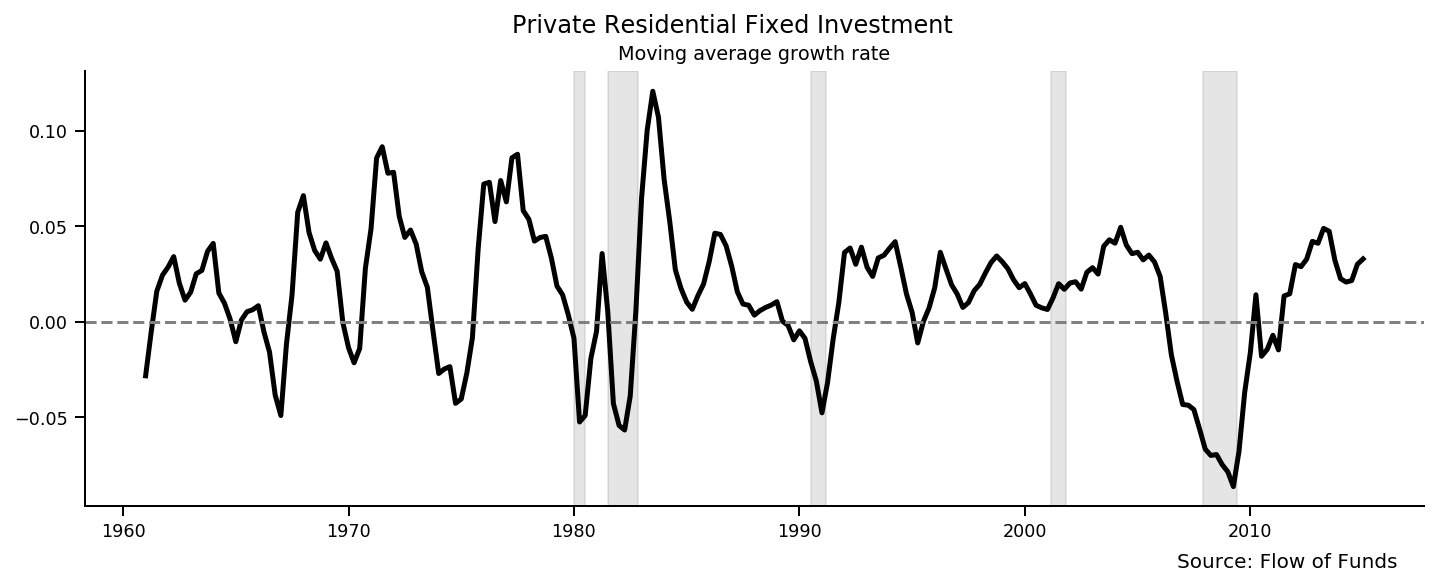

In [25]:
recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax = plt.subplots(figsize =(12,4))
ax.plot(CGdf['Private Residential Fixed Investment'].rolling(4).mean().pct_change(), lw=2.5, color='black')
for i in recessions.index:
    ax.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.1, color='k')

ax.set_xlabel("")
fig.suptitle('Private Residential Fixed Investment')
ax.set_title("Moving average growth rate")
ax.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
ax.axhline(linewidth=1.5, color='gray', ls='dashed')
sns.despine()
plt.show()

In [26]:
start = datetime.datetime(1979, 1, 1)
end = datetime.datetime(2015, 1, 1)

OwnDf = web.DataReader(['MORTGAGE30US', 'MORTGAGE15US', 'MORTGAGE5US', 'MORTGAGE1US', 'CSUSHPISA'], 'fred', start=start, end=end)
OwnDf.columns = ['30-Years', '15-Years', '5/1 Year', '1-Year', 'Case-Shiller']
OwnDf[['30-Years', '15-Years', '5/1 Year', '1-Year']] = OwnDf[['30-Years', '15-Years', '5/1 Year', '1-Year']].apply(lambda x: x/100 + 1)
OwnDf['Case-Shiller'] = OwnDf['Case-Shiller'].apply(lambda x: x/100 )
OwnDf= OwnDf.resample('Q').mean()
OwnDf = OwnDf[OwnDf['Case-Shiller'].dropna().index[0]:]
OwnDf['Inflation'] = OwnDf['Case-Shiller']
start = OwnDf.index[0]

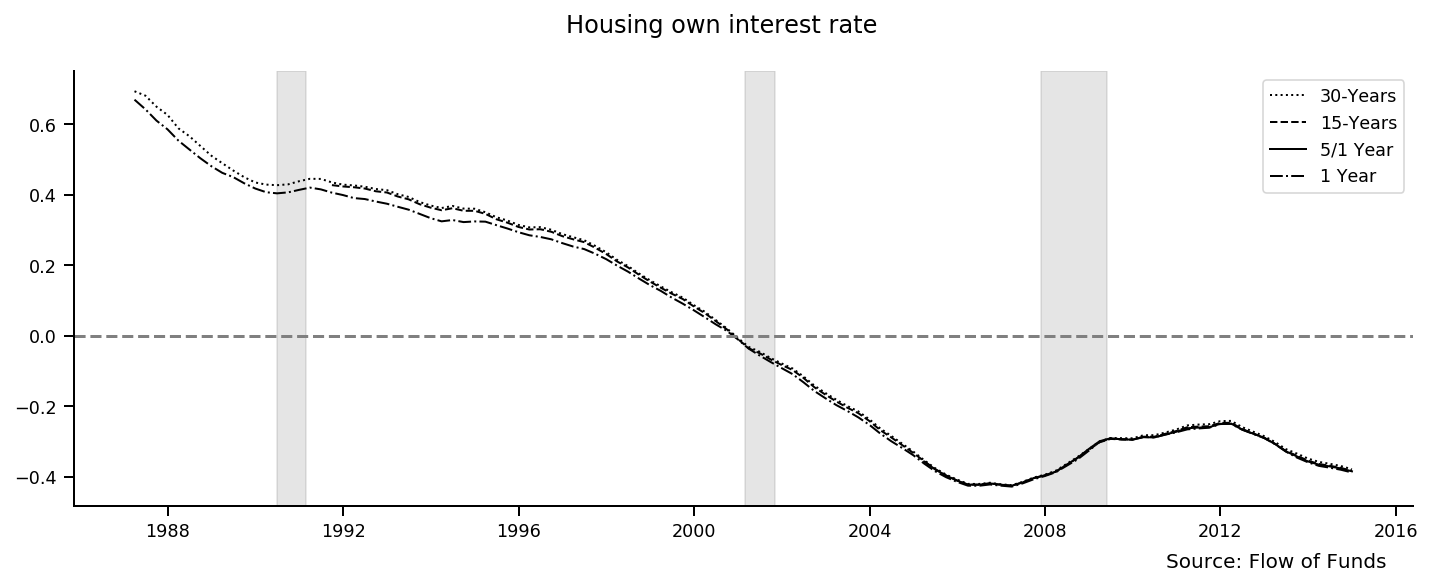

In [27]:
recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax = plt.subplots(figsize =(12,4))
ax.plot(((OwnDf['30-Years']/OwnDf['Inflation'])-1), lw=1, color='black', label='30-Years', ls=':')
ax.plot(((OwnDf['15-Years']/OwnDf['Inflation'])-1), lw=1, color='black', label='15-Years', ls='--')
ax.plot(((OwnDf['5/1 Year']/OwnDf['Inflation'])-1), lw=1, color='black', label='5/1 Year', ls='-')
ax.plot(((OwnDf['1-Year']/OwnDf['Inflation'])-1), lw=1, color='black', label='1 Year', ls='-.')
for i in recessions.index:
    ax.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.1, color='k')

ax.set_xlabel("")
fig.suptitle('Housing own interest rate')
ax.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
ax.axhline(linewidth=1.5, color='gray', ls='dashed')
sns.despine()
plt.legend()
plt.show()

In [28]:
OwnDf

30-Years  15-Years  5/1 Year    1-Year  Case-Shiller  Inflation
DATE                                                                       
1987-03-31  1.091146       NaN       NaN  1.075762      0.643983   0.643983
1987-06-30  1.103431       NaN       NaN  1.078054      0.656090   0.656090
1987-09-30  1.104815       NaN       NaN  1.078369      0.669360   0.669360
1987-12-31  1.108643       NaN       NaN  1.080736      0.681327   0.681327
1988-03-31  1.100683       NaN       NaN  1.076508      0.692683   0.692683
1988-06-30  1.103592       NaN       NaN  1.077031      0.704373   0.704373
1988-09-30  1.104964       NaN       NaN  1.079929      0.718050   0.718050
1988-12-31  1.104100       NaN       NaN  1.082385      0.730677   0.730677
1989-03-31  1.108200       NaN       NaN  1.087877      0.743757   0.743757
1989-06-30  1.106362       NaN       NaN  1.092254      0.752937   0.752937
1989-09-30  1.100077       NaN       NaN  1.086977      0.758543   0.758543
1989-12-31  1.098138       NaN       NaN  1.084985      0.765080   0.765080
1990-03-31  1.101315       NaN       NaN  1.084646      0.770507   0.770507
1990-06-30  1.103238       NaN       NaN  1.085354      0.772770   0.772770
1990-09-30  1.101031       NaN       NaN  1.083523      0.769927   0.769927
1990-12-31  1.099592       NaN       NaN  1.080838      0.764150   0.764150
1991-03-31  1.095008       NaN       NaN  1.076077      0.757373   0.757373
1991-06-30  1.095223       NaN       NaN  1.072723      0.757700   0.757700
1991-09-30  1.092731  1.086900       NaN  1.070592      0.761210   0.761210
1991-12-31  1.086900  1.082954       NaN  1.064400      0.760473   0.760473
1992-03-31  1.086885  1.082977       NaN  1.059531      0.761680   0.761680
1992-06-30  1.086777  1.082815       NaN  1.060038      0.763543   0.763543
1992-09-30  1.080177  1.075331       NaN  1.053131      0.762447   0.762447
1992-12-31  1.081921  1.076871       NaN  1.052486      0.765430   0.765430
1993-03-31  1.077233  1.072233       NaN  1.049858      0.768320   0.768320
1993-06-30  1.074531  1.069362       NaN  1.046700      0.770710   0.770710
1993-09-30  1.070877  1.066046       NaN  1.044715      0.776137   0.776137
1993-12-31  1.070464  1.065736       NaN  1.042400      0.781467   0.781467
1994-03-31  1.072958  1.068008       NaN  1.043183      0.787300   0.787300
1994-06-30  1.084277  1.079192       NaN  1.052646      0.792187   0.792187
...              ...       ...       ...       ...           ...        ...
2007-12-31  1.062246  1.058785  1.059523  1.055500      1.753797   1.753797
2008-03-31  1.058723  1.053754  1.054315  1.051331      1.715810   1.715810
2008-06-30  1.060869  1.056538  1.056615  1.051992      1.666793   1.666793
2008-09-30  1.063223  1.058862  1.059423  1.052131      1.619693   1.619693
2008-12-31  1.058414  1.055579  1.059007  1.051386      1.560350   1.560350
2009-03-31  1.050600  1.047092  1.051542  1.048792      1.500683   1.500683
2009-06-30  1.050123  1.046285  1.048992  1.048315      1.479217   1.479217
2009-09-30  1.051623  1.046062  1.046815  1.047177      1.482443   1.482443
2009-12-31  1.049221  1.043771  1.043357  1.044214      1.479780   1.479780
2010-03-31  1.049958  1.043775  1.042008  1.042542      1.462943   1.462943
2010-06-30  1.049223  1.043000  1.039885  1.040215      1.461620   1.461620
2010-09-30  1.044471  1.039200  1.036400  1.035757      1.439593   1.439593
2010-12-31  1.044362  1.038200  1.035131  1.033054      1.422523   1.422523
2011-03-31  1.048469  1.041238  1.037292  1.032662      1.406217   1.406217
2011-06-30  1.046508  1.038446  1.034477  1.031000      1.399153   1.399153
2011-09-30  1.042915  1.034731  1.031169  1.029054      1.392247   1.392247
2011-12-31  1.040023  1.032954  1.029500  1.028638      1.372490   1.372490
2012-03-31  1.039223  1.031877  1.028408  1.027700      1.370167   1.370167
2012-06-30  1.037946  1.030423  1.028231  1.027608      1.401227   1.401227
2012-09-30  1.035538  1.028377  1.027508  1.026562      1.42

# Propensity to save

Assuming propensity to save defined as:

$$
s = \frac{S}{Y_D}
$$

In [47]:
start = datetime.datetime(1959, 1, 1)
end = datetime.datetime(2015, 1, 1)

df = web.DataReader(['PSAVERT'], 'fred', start, end, access_key=fred_key)
df.columns = [
    'Personal Saving Rate',
]

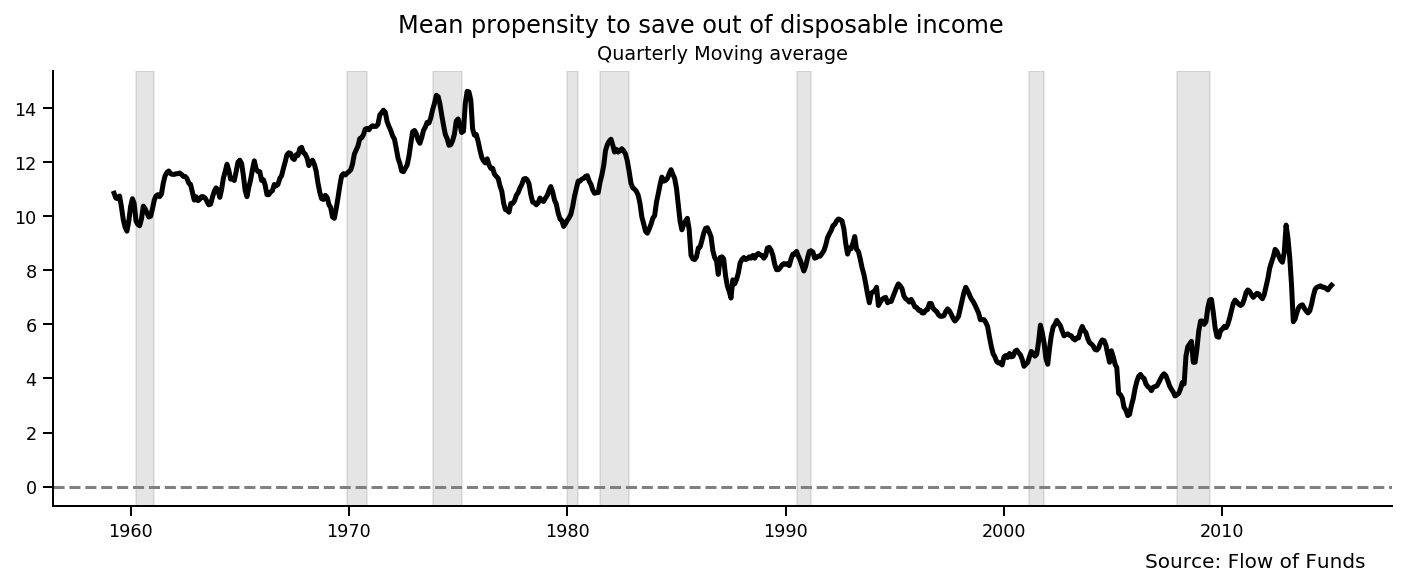

In [49]:
recessions = crisis[crisis > start]
recessions.dropna(inplace=True)

fig, ax = plt.subplots(figsize =(12,4))
ax.plot(df['Personal Saving Rate'].rolling(4).mean(), lw=2.5, color='black')
for i in recessions.index:
    ax.axvspan(recessions['peak'][i], recessions['trough'][i], alpha=.1, color='k')

ax.set_xlabel("")
fig.suptitle("Mean propensity to save out of disposable income")
ax.set_title("Quarterly Moving average")
ax.text(0.98, -0.15, 'Source: Flow of Funds',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
ax.axhline(linewidth=1.5, color='gray', ls='dashed')
sns.despine()
plt.show()

In [50]:
df.head()

Personal Saving Rate
DATE                            
1959-01-01                  11.3
1959-02-01                  10.6
1959-03-01                  10.3
1959-04-01                  11.2
1959-05-01                  10.6